In [2]:
pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=39d833f732cd41215654ee910092954c503460e011ce10e1266d5f94cf01db94
  Stored in directory: c:\users\raymond\appdata\local\pip\cache\wheels\f2\b5\2c\59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking
Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd

In [4]:
data = yf.download("ADA-USD", start="2021-03-01", end="2022-03-01")

[*********************100%***********************]  1 of 1 completed


In [27]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,1.309792,1.342408,1.239300,1.292388,1.292388,9775330113
2021-03-02,1.293609,1.299627,1.188732,1.225582,1.225582,8118255106
2021-03-03,1.225719,1.263525,1.214234,1.216593,1.216593,4937160429
2021-03-04,1.216445,1.229674,1.069218,1.114868,1.114868,7164490225
2021-03-05,1.114639,1.195125,1.041156,1.168523,1.168523,7325099027


In [28]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-25,0.853572,0.906541,0.829244,0.898027,0.898027,1652894219
2022-02-26,0.897996,0.928296,0.885401,0.887918,0.887918,1099934921
2022-02-27,0.887788,0.912676,0.840146,0.858335,0.858335,1278510571
2022-02-28,0.857870,0.967613,0.845040,0.959828,0.959828,1779202386
2022-03-01,0.959886,1.005403,0.944935,0.962346,0.962346,1778795527


In [18]:
data['Adj Close'].head()

Date
2021-03-01    1.292388
2021-03-02    1.225582
2021-03-03    1.216593
2021-03-04    1.114868
2021-03-05    1.168523
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

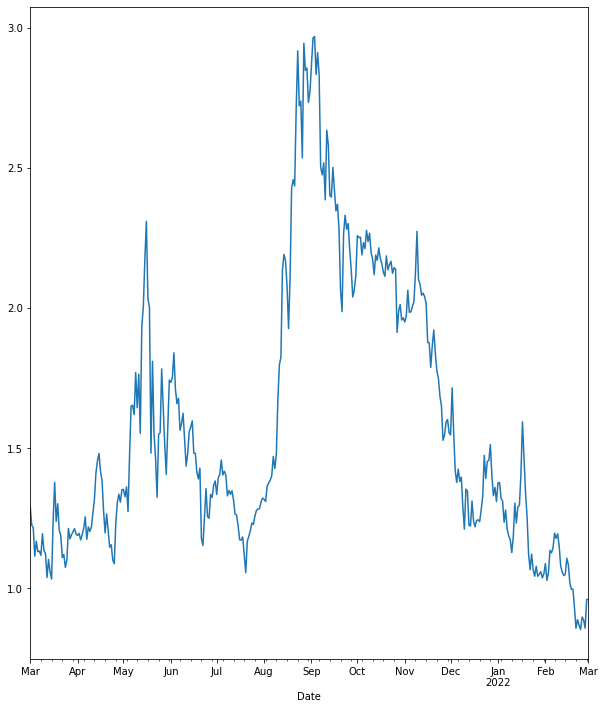

In [19]:
data['Adj Close'].plot(figsize=(10, 12), subplots=True)

In [22]:
normal_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.051691876351770666,
 -0.00733445534629319,
 -0.08361463529254065,
 0.04812669031246261,
 -0.03210120175089859]

In [24]:
log_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.05307580459089063,
 -0.007361484708771245,
 -0.08731829894994607,
 0.047004466295252435,
 -0.03262774443433109]

In [25]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 0.33707142 and its annulized volatility is 1.13276227


In [29]:
import os

In [30]:
S0 =0.959886         # spot stock price
K = 500              # strike
T = 1.0                 # maturity 
r = 0.0114                # risk free rate 
sig = 1.132               # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff 

In [31]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u             

In [32]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [33]:
S

array([[0.959886  , 1.8452592 , 3.54727697, 6.81919045],
       [0.        , 0.49932342, 0.959886  , 1.8452592 ],
       [0.        , 0.        , 0.25974322, 0.49932342],
       [0.        , 0.        , 0.        , 0.13511591]])

In [34]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.3449028505753892

In [36]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.1547408 ],
       [0.        , 0.        , 0.        , 1.50067658],
       [0.        , 0.        , 0.        , 1.86488409]])

In [37]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[1.21292849, 0.70853914, 0.10098578, 0.        ],
       [0.        , 1.48553419, 1.03252842, 0.1547408 ],
       [0.        , 0.        , 1.7326712 , 1.50067658],
       [0.        , 0.        , 0.        , 1.86488409]])

In [40]:
print('European ' + payoff, str( V[0,0]))

European put 1.21292848791291


In [41]:
# for American Option
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[1.22451154, 0.71348958, 0.10098578, 0.        ],
       [0.        , 1.50067658, 1.040114  , 0.1547408 ],
       [0.        , 0.        , 1.74025678, 1.50067658],
       [0.        , 0.        , 0.        , 1.86488409]])

In [42]:
print('American ' + payoff, str( V[0,0]))

American put 1.2245115444798687


In [43]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [44]:
T = 1
r = 0.0114
sigma = 1.132
S0 = 0.959886
K = 2 

In [45]:
S = mcs_simulation_np(1000)

In [46]:
S = np.transpose(S)
S

array([[0.959886  , 1.00158749, 0.93778464, ..., 0.10057197, 0.10123251,
        0.09606882],
       [0.959886  , 0.9823371 , 1.0361671 , ..., 1.80647564, 1.81763608,
        1.80841637],
       [0.959886  , 0.92324703, 0.90266652, ..., 0.50938119, 0.53773832,
        0.51370171],
       ...,
       [0.959886  , 1.001842  , 0.9607651 , ..., 1.65227134, 1.69331864,
        1.75384391],
       [0.959886  , 1.02625278, 1.01649811, ..., 1.25074017, 1.25806707,
        1.30502738],
       [0.959886  , 0.95475208, 0.93360029, ..., 0.20219143, 0.21080855,
        0.2163431 ]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

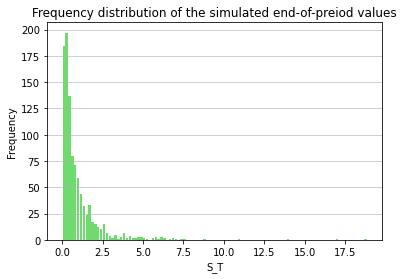

In [49]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#32cd32',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [50]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 1.2370335436209703


In [51]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 0.2369453481944099
